# This notebook is for visualizing HW average vs Final Grade

The data in this notebook was gotten from the courses I teach. All personal information has been removed. The goal of this notebook is to display the importance of doing homework compared to the final grade in the course. I prepared the data in excel, so there is not much data preparation to take care of.

A note here is that, for the courses below, HW only counted for 10-20% of the final grade, so 80-90% of the grade was not accounted for when looking at just homework.

There are a variety of courses which I will outline here:

MAT1033 = Intermediate Algebra

MAC1105 = College Algebra

MAC1114 = Trigonometry

MAC1140 = PreCalculus Algebra

MAC2233 = Business Calculus


For the suffixes on the classes, 'Online' means the course was a fully online course, and 'F2F' means the courses had a set time to meet, so it is not fully online (F2F stands for face-to-face).

I had HW, Quiz, Final, and Course columns in most of the courses, so you will see below that I had to drop the quiz column from many.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mac_1105_online = pd.read_csv('MAC1105Online.csv')
mac_1114 = pd.read_csv('MAC1114.csv')
mac_1140 = pd.read_csv('MAC1140.csv')
mat_1033_online = pd.read_csv('MAT1033Online.csv')
mac_2233 = pd.read_csv('MAC2233.csv')
mac_1105 = pd.read_csv('MAC1105.csv')

In [3]:
mac_1105 = mac_1105.drop('Quizzes', axis=1)
mac_1105_online = mac_1105_online.drop('Quizzes', axis=1)
mac_1114 = mac_1114.drop('Quizzes', axis=1)
mac_1140 = mac_1140.drop('Quizzes', axis=1)
mac_2233 = mac_2233.drop('Quizzes', axis=1)

# mat_1033_online did not have quizzes

In [4]:
# All dataframes have 3 columns: HW, Final, and 'Course' compare the HW grade to final grade. 
# Note: HW grade <= 20% of the final grade, so a high correlation is very insightful, but
# a low correlation would not be too surprising.

# I will show the head of one of the dataframes so you can see what one looks like

mac_1105.head()

,HW,Final,Course
0,77.62,79.90,MAC1105F2F
1,78.07,83.29,MAC1105F2F
2,99.03,79.67,MAC1105F2F
3,90.55,72.30,MAC1105F2F
4,64.32,85.05,MAC1105F2F


In [5]:
mat_1033_online.corr()

,HW,Final
HW,1.000000,0.761647
Final,0.761647,1.000000


In [6]:
mac_1105.corr()

,HW,Final
HW,1.000000,0.927077
Final,0.927077,1.000000


In [7]:
mac_1105_online.corr()

,HW,Final
HW,1.000000,0.818316
Final,0.818316,1.000000


In [8]:
mac_1114.corr()

,HW,Final
HW,1.000000,0.742422
Final,0.742422,1.000000


In [9]:
mac_1140.corr()

,HW,Final
HW,1.000000,0.777389
Final,0.777389,1.000000


In [10]:
mac_2233.corr()

,HW,Final
HW,1.000000,0.734127
Final,0.734127,1.000000


In [11]:
# Combine all the datasets into one for simplicity with visualizations
combined_class_data = pd.concat([mac_1114, mac_1140, mac_1105_online, mat_1033_online, mac_2233, mac_1105])

combined_class_data.corr()

,HW,Final
HW,1.000000,0.768591
Final,0.768591,1.000000


In [12]:
combined_class_data.info() # no null data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 60
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HW      509 non-null    float64
 1   Final   509 non-null    float64
 2   Course  509 non-null    object 
dtypes: float64(2), object(1)
memory usage: 15.9+ KB


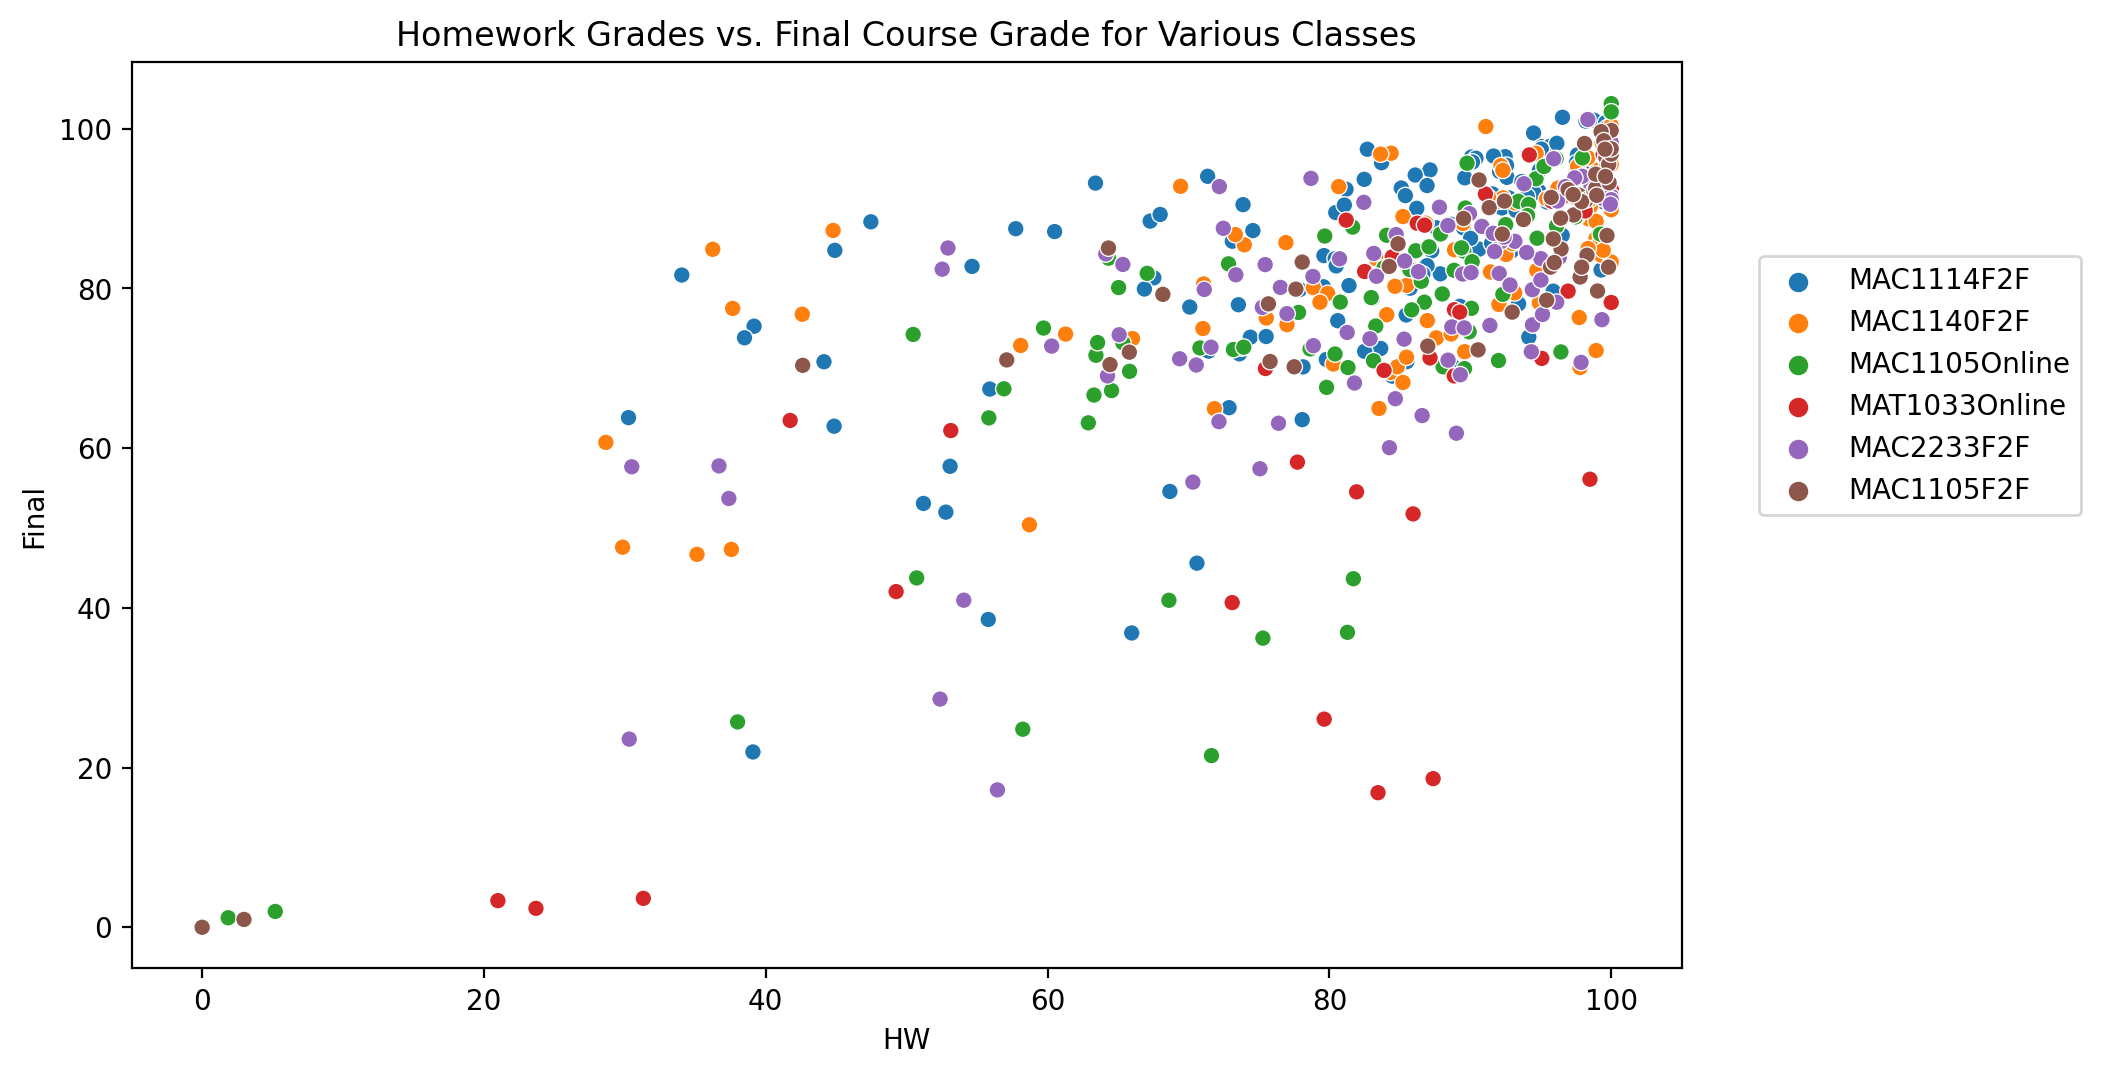

In [13]:
# Make Scatterplot
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(x='HW', y='Final', data=combined_class_data, hue='Course')

plt.legend(loc=(1.05,0.5))
plt.title('Homework Grades vs. Final Course Grade for Various Classes')
plt.show()

In [14]:
# Let's break the combined class data into HW high and low groups. Making 80% the breaking point
threshold = 80

HW_high = combined_class_data[combined_class_data['HW'] >= threshold]
HW_low = combined_class_data[combined_class_data['HW'] < threshold]

print('Amount of HW_high data points: ' + str(len(HW_high)))
print('Amount of HW_low data points: ' + str(len(HW_low)))

Amount of HW_high data points: 348
Amount of HW_low data points: 161


# Explore the High HW grades

In [15]:
HW_high.describe().transpose()
# Unsurprisingly, this shows a pretty high Final grade for the average student
# that had a HW grade of at least an 80.
# The 25% value of 80.2 for 'Final' Shows that at least 75% of students with >= 80 HW average
# got an 'A' or 'B' in the course.

,count,mean,std,min,25%,50%,75%,max
HW,348.0,92.531293,6.024660,80.28,87.335,93.425,98.120,100.00
Final,348.0,85.911609,11.298709,16.85,80.200,88.270,93.745,103.13


In [16]:
# We will look into the HW_high set first, and see what percentage of students in this group
# pass the course and failed the course. Passing the course is a 'Final' score of at least 70%
passing_threshold = 70

HW_high_class_fail = HW_high[HW_high['Final'] < passing_threshold]
HW_high_class_pass = HW_high[HW_high['Final'] >= passing_threshold]

print('Percentage of student with high HW grades that failed: ' + 
      str(len(HW_high_class_fail) / len(HW_high) * 100))

print('Percentage of student with high HW grades that passed: ' + 
      str(len(HW_high_class_pass) / len(HW_high) * 100))

Percentage of student with high HW grades that failed: 5.747126436781609
Percentage of student with high HW grades that passed: 94.25287356321839


In [17]:
HW_high_class_pass.describe().transpose()

# Interesting to point out. We will look at the HW_high_class_fail below,
# since that is of more interest.

,count,mean,std,min,25%,50%,75%,max
HW,328.0,92.942927,5.885464,80.28,88.570,94.170,98.295,100.00
Final,328.0,87.649268,8.195618,70.08,82.105,89.055,94.015,103.13


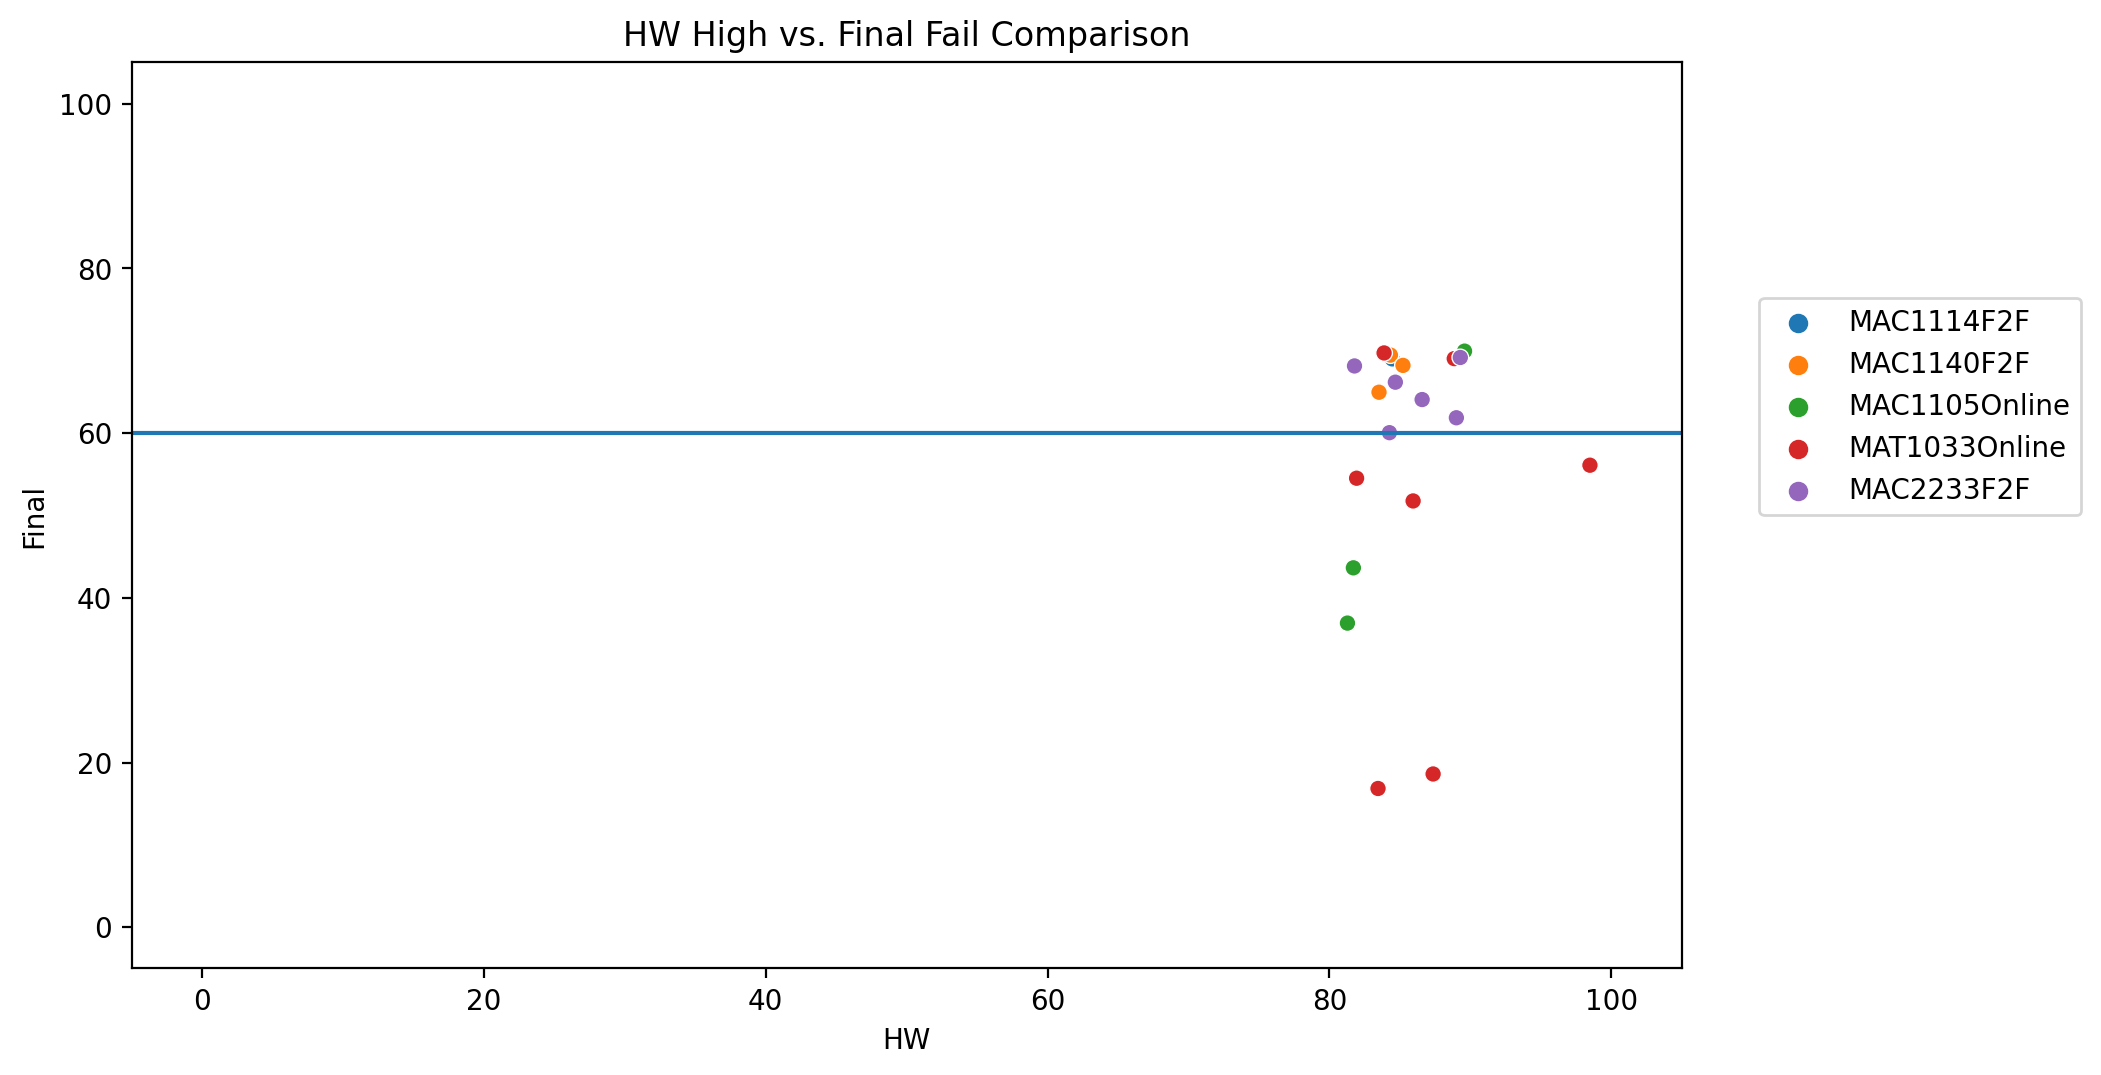

In [18]:
# Out of interest, I want to look into the students that failed the course despite having a high HW grade

plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(x='HW', y='Final', data=HW_high_class_fail, hue='Course')

plt.xlim(-5,105)
plt.ylim(-5,105)

plt.axhline(y=60)
plt.legend(loc=(1.05,0.5))
plt.title('HW High vs. Final Fail Comparison')
plt.show()

# Unsurprisingly, many of these students were still close to the 70. There were a few data points
# that had much lower grades. Given that HW was not a large percentage of the course, it is
# probably that many of the students, especially the bottom two points, probably missed
# an exam or two.

# Note that the blue line is at y=60, and students with grades from 60-70 get a D final letter grade
# instead of an F. Of particular interst to me is all the students below this y=60 line
# were online students. This could show that these students did not keep up with the course at one
# portion of the class or did not respond to emails I may have sent them if they missed an exam.

# Explore the Low HW Grades

In [19]:
HW_low.describe().transpose()

# Unsurprisingly, this is much lower. In comparsion to above
# where to ~75% for the high_HW data received a final grade of A or B,
#only ~25% got an A or B receieved an A or B from the low_HW dataset.

,count,mean,std,min,25%,50%,75%,max
HW,161.0,58.272795,21.714048,0.0,50.46,65.80,73.87,79.88
Final,161.0,63.069068,25.712368,0.0,55.74,72.34,80.10,94.03


In [20]:
# I will break the HW_low data up into those that passed and failed to analyze each.

HW_low_class_pass = HW_low[HW_low['Final'] >= passing_threshold]
HW_low_class_fail = HW_low[HW_low['Final'] < passing_threshold]


print('Percentage of student with low HW grades that failed: ' + 
      str(len(HW_low_class_fail) / len(HW_low) * 100))

print('Percentage of student with high HW grades that passed: ' + 
      str(len(HW_low_class_pass) / len(HW_low) * 100))

# Another stark difference: In the high_HW dataset, <6% of students in that dataset failed,
# but in the low_HW dataset, we can see around 41% failed. It shows that failing the course
# with a low HW grade is roughly seven times more common than having a high HW grade, despite
# the fact that the HW grade is not a large percentage of the final grade overall.

Percentage of student with low HW grades that failed: 40.993788819875775
Percentage of student with high HW grades that passed: 59.006211180124225


In [21]:
HW_low_class_pass.describe().transpose()

# This group of students that passed the course while having low homework grades, on average,
# receivd a letter grade of 'C'. I found this particularly interesting, once again,
# because HW grades do not have such a great direct influence on final exam grades.
# For example, a student with a 90% HW grade compared to another student with a 70% HW grade,
# would only have a direct difference of 4% overall grade if the HW grade was 20% of the final grade,
# but the data is clearly showing a much larger difference.

# The mean final grade for low_HW that passed is ~79.3,
# whereas the mean final grad eofr high_HW that passed is ~87.6.

# A difference of 8.3% overall, and as we know, the closer a grade is to 100%, the harder
# it is to improve since the max is 100%.

,count,mean,std,min,25%,50%,75%,max
HW,95.0,67.131684,11.743208,34.04,63.49,71.07,75.595,79.88
Final,95.0,79.276632,6.507344,70.17,73.20,79.25,84.205,94.03


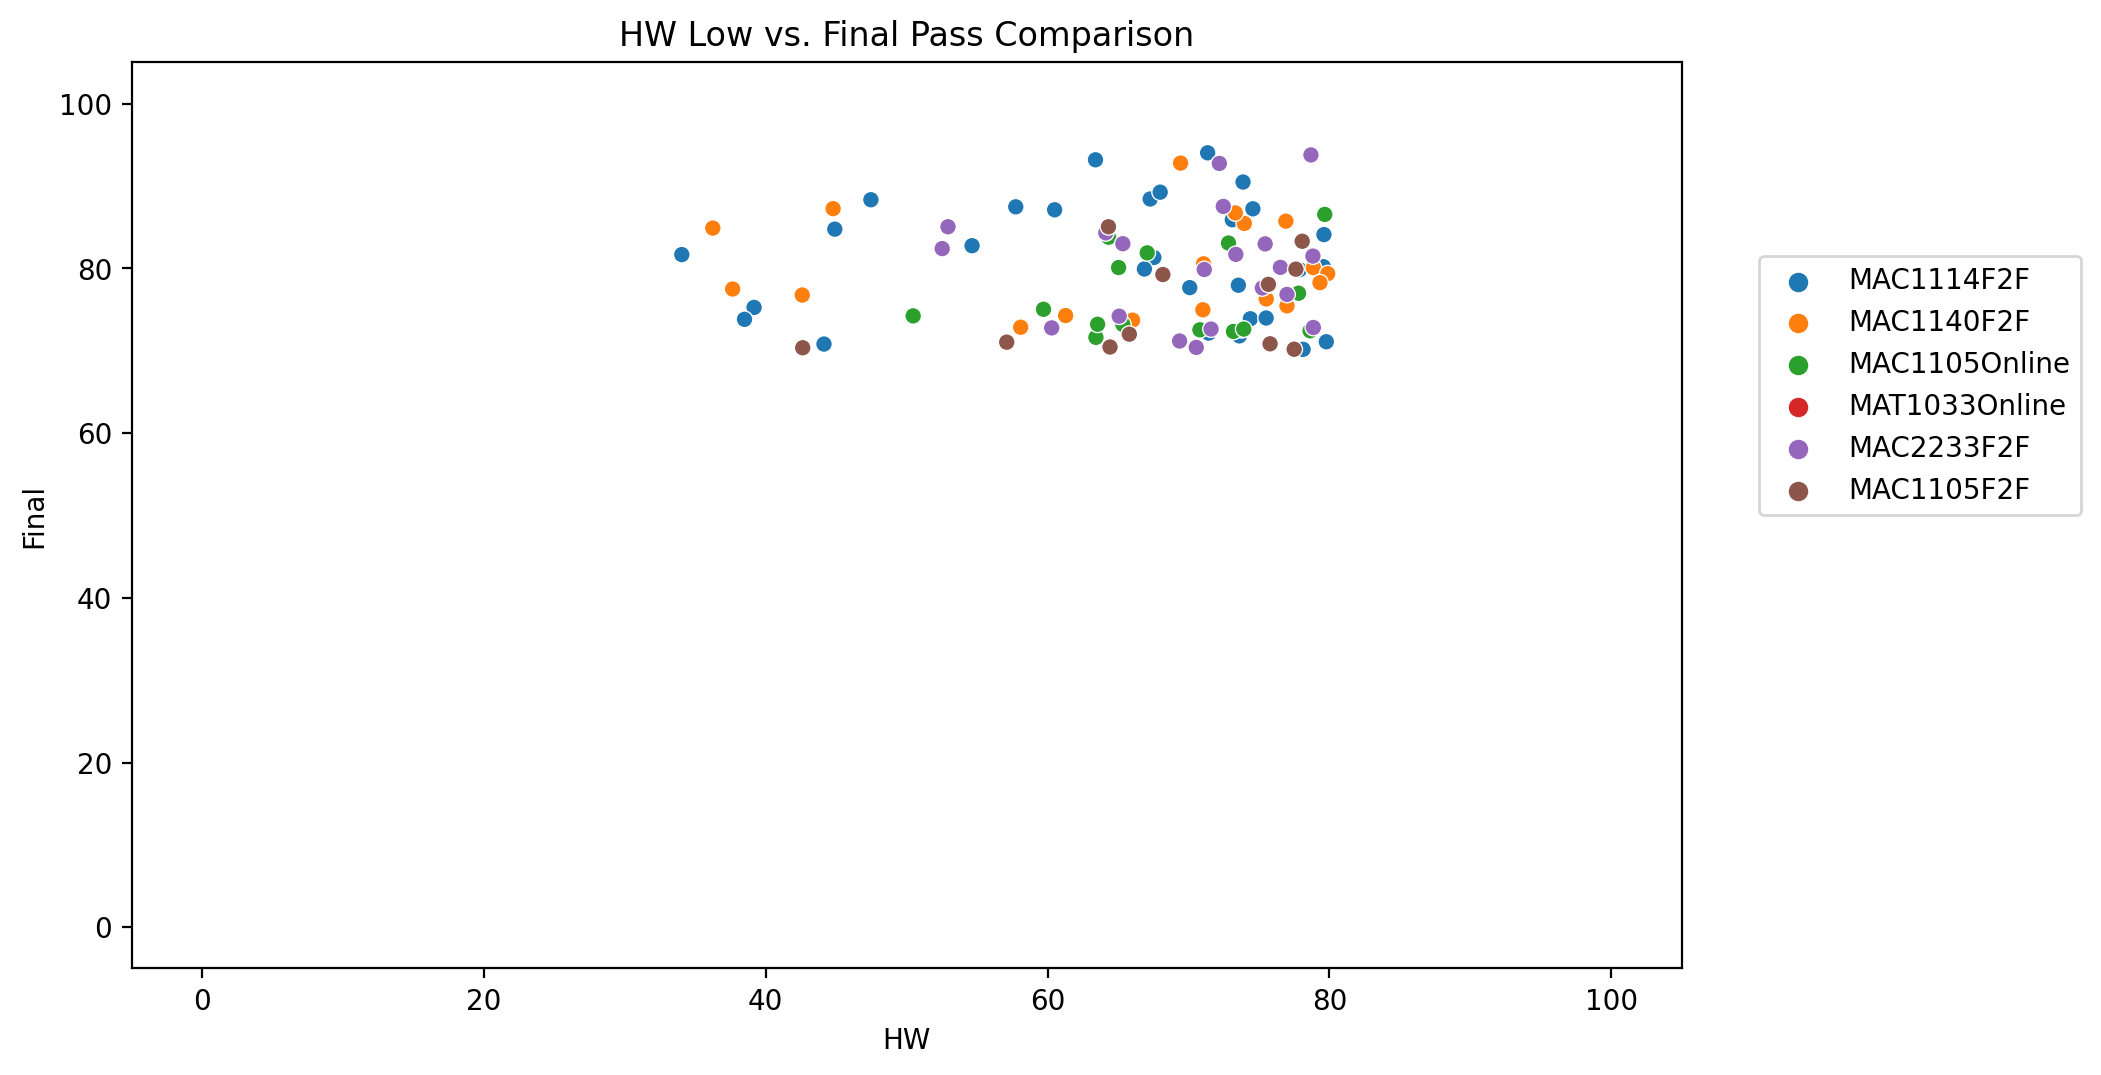

In [22]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(x='HW', y='Final', data=HW_low_class_pass, hue='Course')

plt.xlim(-5,105)
plt.ylim(-5,105)

plt.legend(loc=(1.05,0.5))
plt.title('HW Low vs. Final Pass Comparison')
plt.show()

# This figure shows the data values of students who passed despite having low HW grades.
# As we can see, most HW grade are still pretty high. We will compare this to HW_low_class_fail below

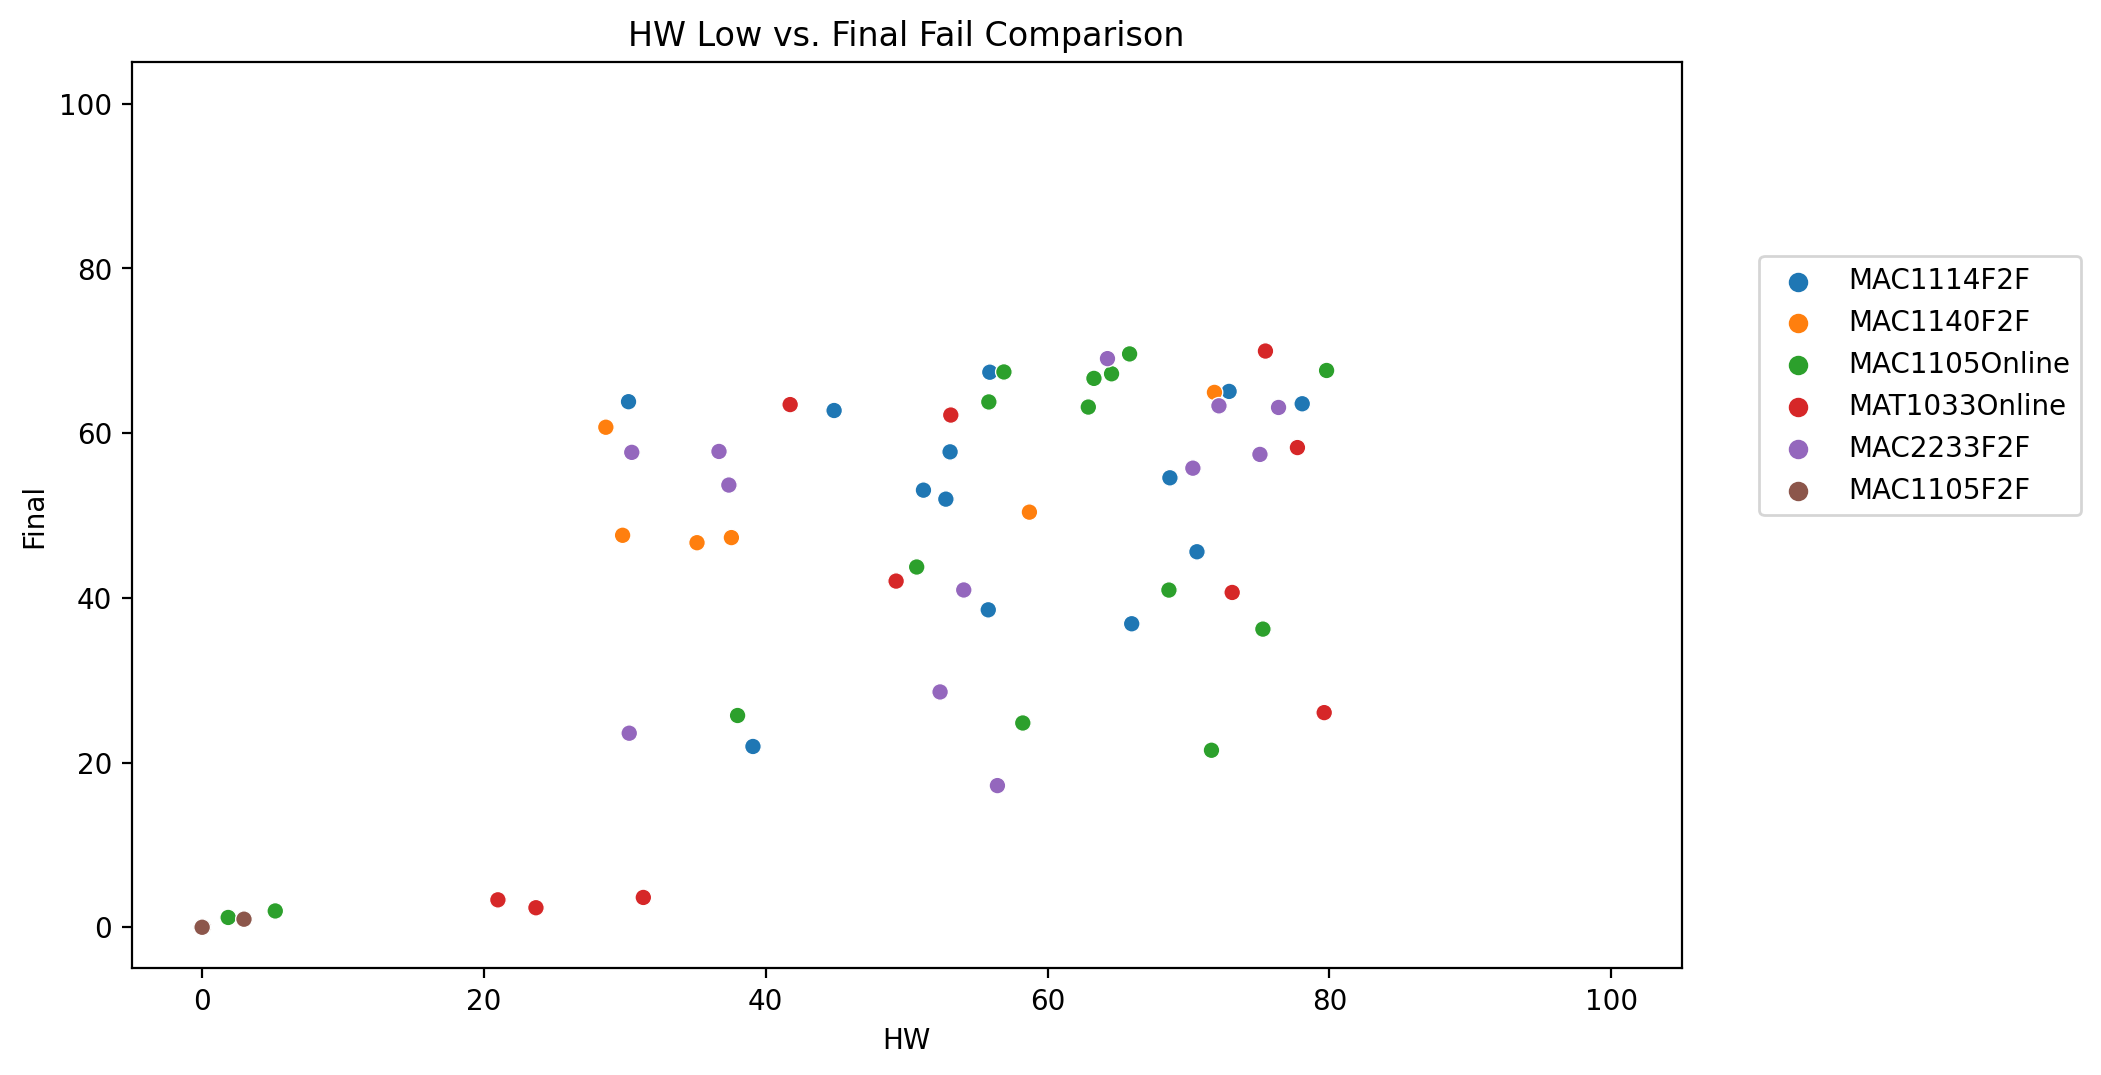

In [23]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(x='HW', y='Final', data=HW_low_class_fail, hue='Course')

plt.xlim(-5,105)
plt.ylim(-5,105)

plt.legend(loc=(1.05,0.5))
plt.title('HW Low vs. Final Fail Comparison')
plt.show()

# This shows much less consistency than the figure for HW Low vs Final Pass.

# As we would expect, a failing grade can happen for many reasons, but HW grades are more scattered.

# Pie Chart Visualization Summary of the Above Breakdown

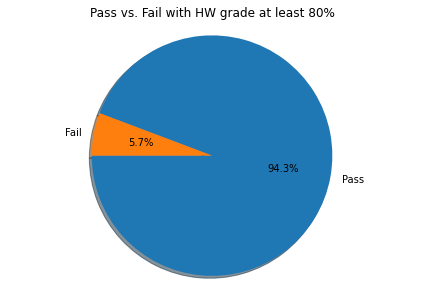

In [24]:
labels = ['Pass', 'Fail']
sizes = [len(HW_high_class_pass), len(HW_high_class_fail)]
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Pass vs. Fail with HW grade at least 80%')
plt.show()

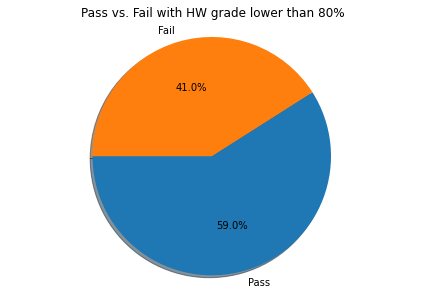

In [25]:
labels = ['Pass', 'Fail']
sizes = [len(HW_low_class_pass), len(HW_low_class_fail)]
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Pass vs. Fail with HW grade lower than 80%')
plt.show()

# Breakdown HW Grades by Each Letter Grade

Below I turned my focus to a less arbitrary split of 80% to each letter grade to find out if we can uncover more trends in HW grades compared to the pass/fail of the course.

In [26]:
# We can break this down even further to letter grade.
# A > 90, B in [80,90), C in [70,80), D in [60,70), F < 60

HW_A = combined_class_data[combined_class_data['HW'] >= 90]
HW_B = combined_class_data[(combined_class_data['HW'] < 90) & (combined_class_data['HW'] >= 80)]
HW_C = combined_class_data[(combined_class_data['HW'] < 80) & (combined_class_data['HW'] >= 70)]
HW_D = combined_class_data[(combined_class_data['HW'] < 70) & (combined_class_data['HW'] >= 60)]
HW_F = combined_class_data[combined_class_data['HW'] < 60]

In [27]:
len(HW_A), len(HW_B), len(HW_C), len(HW_D), len(HW_F) # Just to observe the amount in each dataset.

(225, 123, 67, 32, 62)

In [28]:
# We will first break up each of the above HW dataframes to pass/fail splits.
HW_A_pass = HW_A[HW_A['Final'] >= 70]
HW_A_fail = HW_A[HW_A['Final'] < 70]

HW_B_pass = HW_B[HW_B['Final'] >= 70]
HW_B_fail = HW_B[HW_B['Final'] < 70]

HW_C_pass = HW_C[HW_C['Final'] >= 70]
HW_C_fail = HW_C[HW_C['Final'] < 70]

HW_D_pass = HW_D[HW_D['Final'] >= 70]
HW_D_fail = HW_D[HW_D['Final'] < 70]

HW_F_pass = HW_F[HW_F['Final'] >= 70]
HW_F_fail = HW_F[HW_F['Final'] < 70]

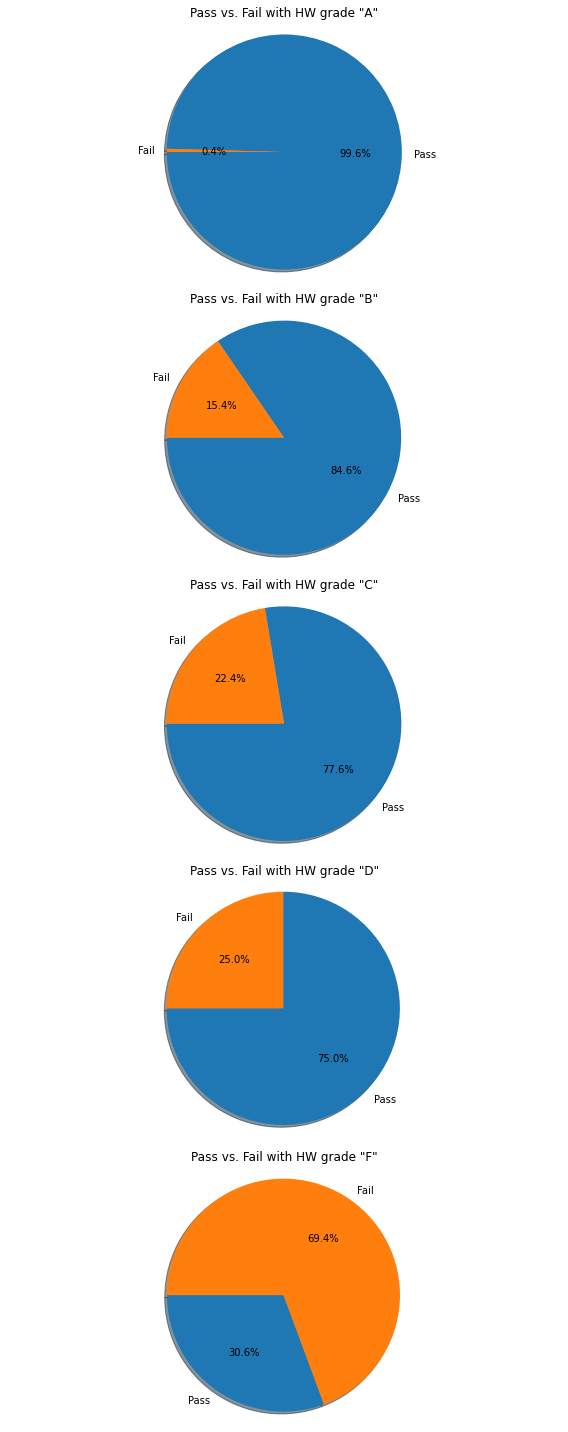

In [29]:
# Visually compare the pass/fail rate for each group.

labels = ['Pass', 'Fail']

sizes0 = [len(HW_A_pass), len(HW_A_fail)]
sizes1 = [len(HW_B_pass), len(HW_B_fail)]
sizes2 = [len(HW_C_pass), len(HW_C_fail)]
sizes3 = [len(HW_D_pass), len(HW_D_fail)]
sizes4 = [len(HW_F_pass), len(HW_F_fail)]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))
axes[0].pie(sizes0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
axes[0].axis('equal')  
axes[1].pie(sizes1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
axes[1].axis('equal')
axes[2].pie(sizes2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
axes[2].axis('equal')
axes[3].pie(sizes3, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
axes[3].axis('equal')
axes[4].pie(sizes4, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
axes[4].axis('equal')

axes[0].set_title('Pass vs. Fail with HW grade "A"')
axes[1].set_title('Pass vs. Fail with HW grade "B"')
axes[2].set_title('Pass vs. Fail with HW grade "C"')
axes[3].set_title('Pass vs. Fail with HW grade "D"')
axes[4].set_title('Pass vs. Fail with HW grade "F"')

plt.tight_layout()

fig.savefig('HWvFinalGrades.jpg', bbox_inches='tight')
plt.show()

Unsurprisingly, the lower the HW grade is, the more likely failing the course occurred. However, I find it interesting that the HW averages of B, C, or D, which would be 60-89, does not have a very large difference in failing rates, going from 15-25%. We see the largest increases in failing rates with A to B (0.4% to 15.4%) and an extremely large jump from D to F (25% to 69.4%). To me, this really shows two things:

1) Since HW can be done over and over again until 100% is achieved, those willing to put in enough effort to get an A average on the HW are the student that are certain to not fail (except very rarely). The difference in getting a 95% compared to 85% HW average may not make a huge difference directly for the final grade, but indirectly, the chart above does show that the 95% HW average is a much stronger bet for passing the course than the 85%, although the 85% HW average student is still very likely to pass.

2) Students that put in enough work to get a 60% on the HW are still more likely to pass than fail. Even though that is not a high HW grade by any means, the threshold of getting at least a 60% means some effort was put forth by the student, and their final grade of passing is likely to be rewarded. However, there is no lower bound on a HW average of an F (aside from 0%), so those students are far more likely to fail than pass.

3) If we broke the 'F' grades down even further, we would probably see a more steady decline at some point, but seeing as the dataset for HW_F is already pretty small, breaking it down further will probably only give more isolated statistics that would not be representative of a population. We will visually break down HW_F below, though.

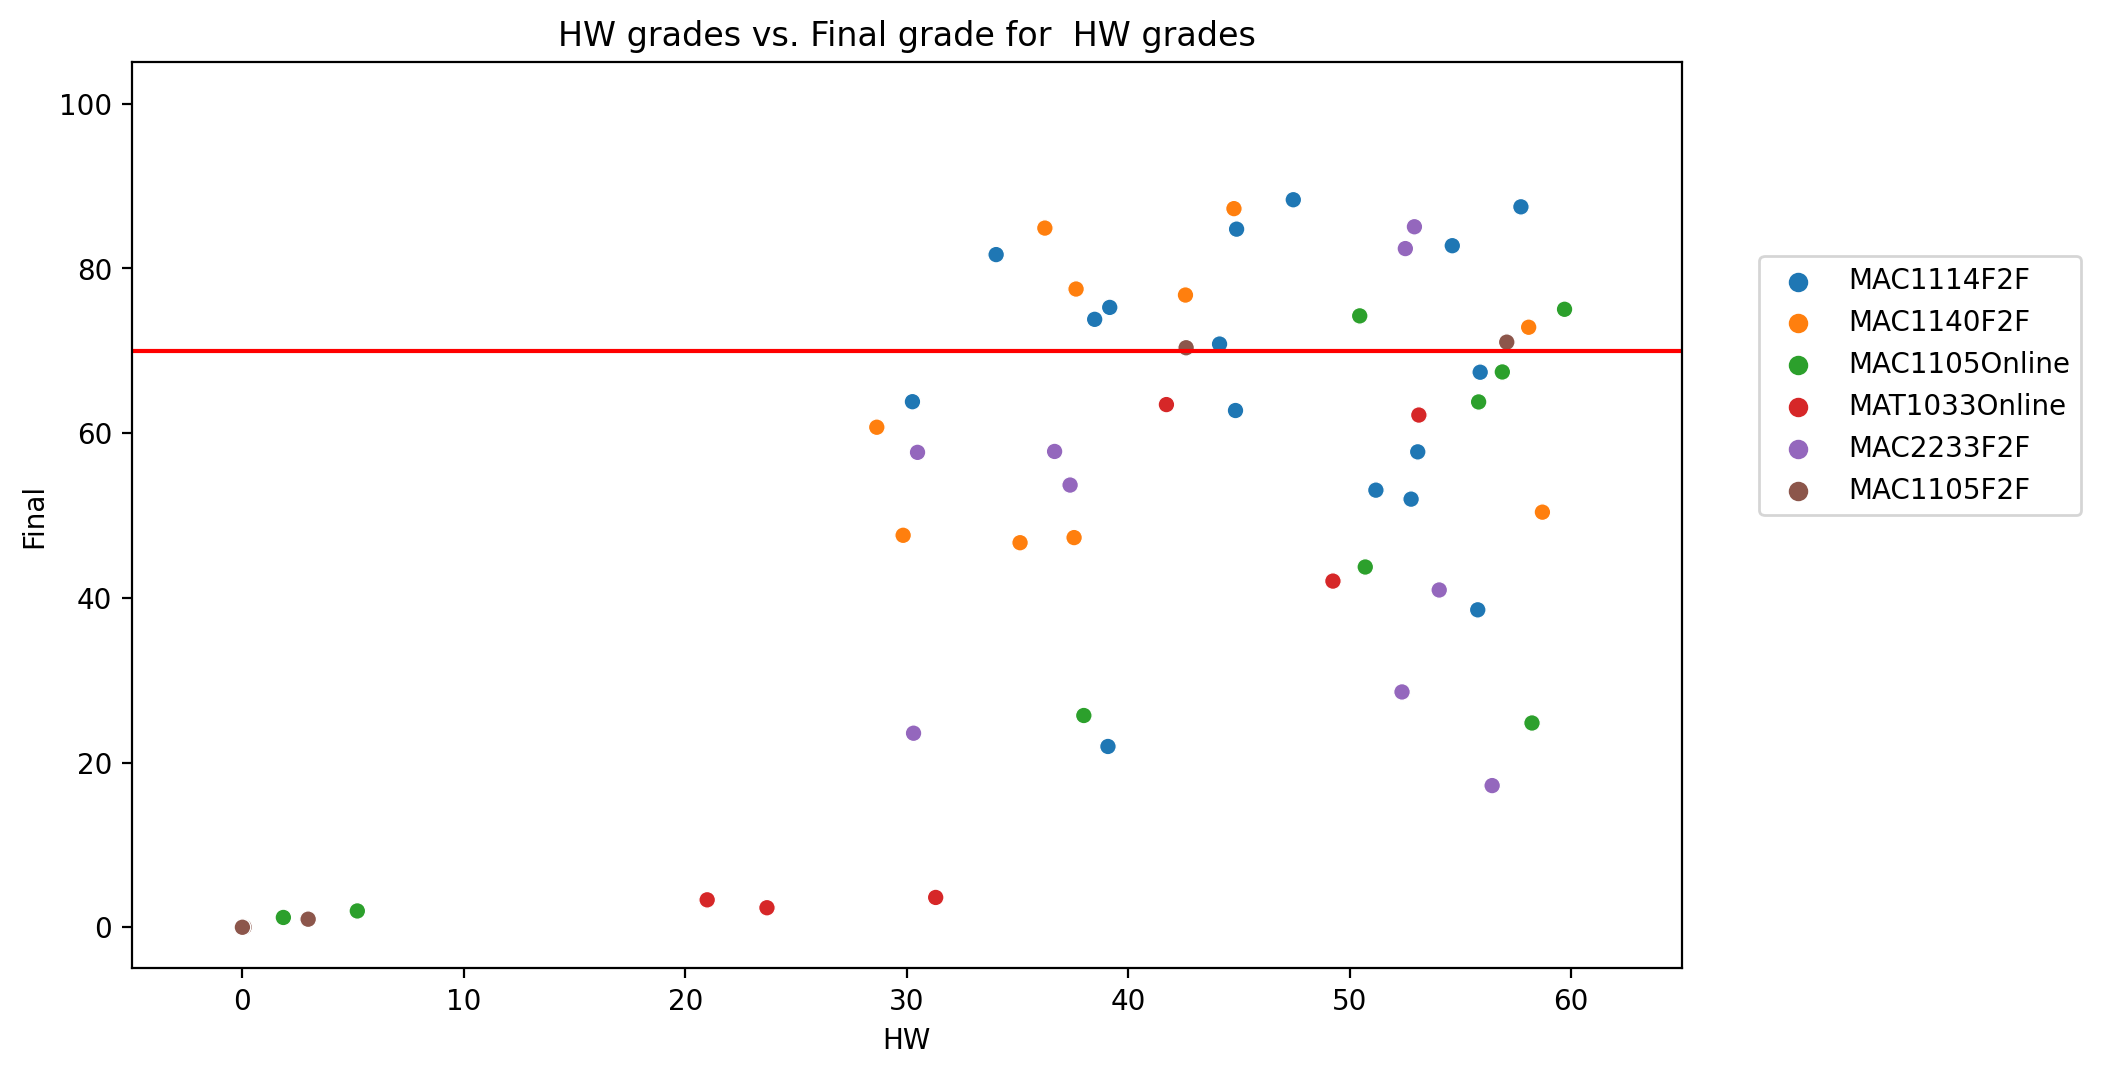

In [30]:
plt.figure(figsize=(10,6),dpi=200)

sns.scatterplot(data=HW_F, x='HW', y='Final', hue='Course')

plt.axhline(y=70, color='red')

plt.xlim(-5,65)
plt.ylim(-5,105)

plt.legend(loc=(1.05, 0.5))

plt.title('HW grades vs. Final grade for 'F' HW grades')
plt.show()

# The below visual shows us exactly what we would think. Those that pass despite having an F
# HW average do not have the "extremely" low HW grades. The lowest one appears to be ~35%, and
# there is about 12 data points with lower HW averages that all failed the course.

# Additionally, the difference in passing vs failing the course with a HW average of an F
# may simply be due to natural mathematical ability. Students with poor HW grades could be
# due to weakness in math, but also we can consider that some of these students are probably
# strong in math, but simply find the HW boring and know what they need to do to pass the course.
# Of course, motivation to do your best is another topic entirely!

For this data, there is no reason to apply any machine learning techniques since there is only variable we are truly interested in to predict an outcome. However, I think this exploration had some outstanding conclusions and insights.

As a math professor, and a long time student of mathematics, I understand how important it is to do the work on your own to learn the material. Many students fall into the trap of thinking, if they see it done, they will be able to reproduce it, but that is far from the case for most students. Doing the HW shows a strong correlation to success in my math courses (and probably any math course, as long as the HW is helpful).

Because of the insights I found here, I will be making HW a higher grade in my courses going forward. The students that already do the HW will continue to do it, but some of the students that may think it is not important to do the HW since it doesn't have a large weight on their final grade will now be more motivated to do it, and hopefully this will have the effect of the students learning more overall and passing at higher rates.

We also have nice visuals to prove to the students how important HW is!